In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#read csv 
data = pd.read_csv('housing.csv')
    
    
#Giving you column names to make it easy for you
x_columns = ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
y_column = ["median_house_value"]

#DROP NAN ROWS HERE
data = data.drop(columns = ['ocean_proximity'])
data = data.dropna()

# Data Cleaning and Feature Creation

In [4]:
# Making Features from categorical variables
# If you can see the dataframe, it's obvious that our algorithm can't take in the column ocean_proximity, 
# since it isn't in the form of numbers, which is the input to our linear equation. 
# Let's do a simple transformation and turn this into a simple binary classification

In [5]:
#Normalizing Vectors 

#Task: Implement min/max data normalization on continous data 
#Inputs: Dataframe and list of column names which you want to normalize
#Outputs: Dataframe with normalized columns

# Pseudocode data_normalized = data / max of data

#min max normalization

def normalize_data(df,columns):
    #Empty dataframe
    normalized_df = pd.DataFrame()
    
    for col in columns:
        normalized_df[col] = df[col]/df[col].max()
    
    
    return normalized_df


In [6]:
norm_data = normalize_data(data,["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"])

In [7]:
norm_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,1.069285,0.902980,0.788462,0.022380,0.020016,0.009024,0.020717,0.555010
1,1.069198,0.902503,0.403846,0.180544,0.171606,0.067289,0.187110,0.553423
2,1.069373,0.902265,1.000000,0.037309,0.029480,0.013901,0.029102,0.483823
3,1.069460,0.902265,1.000000,0.032401,0.036462,0.015638,0.036008,0.376204
4,1.069460,0.902265,1.000000,0.041378,0.043445,0.015834,0.042585,0.256412
5,1.069460,0.902265,1.000000,0.023372,0.033049,0.011574,0.031733,0.269118
6,1.069460,0.902026,1.000000,0.064471,0.075873,0.030660,0.084512,0.243938
7,1.069460,0.902026,1.000000,0.078942,0.106594,0.032425,0.106379,0.207999
8,1.069548,0.902026,0.807692,0.064980,0.103181,0.033799,0.097830,0.138692
9,1.069460,0.902026,1.000000,0.090259,0.109697,0.043467,0.117396,0.246078


In [8]:
#turn normalized data into a numpy array that we can do things with these values
x = norm_data.values
y = data["median_house_value"].values

# Training our Model

In [9]:
#Setting up hyperparameters

#Alpha is our learning rate, I'll explain this later
alpha = 0.01

iterations = 10000
#Iterations is how many times we will run our algorithm

In [10]:
# Note: np.dot() is simply matrix and vector multiplication, while np.inner() is the standard definition of dot product

def train(x,y,iterations,alpha):
    #Setting up variables
    
    #Storing our cost function, Mean Squared Error
    history = []
    
    #Finding the number of weights we need and also the number of samples
    num_weights = x.shape[1] 
    n = x.shape[0]
    
    #Initializing our weights to random numbers
    np.random.seed(69420)
    weights = np.random.random(num_weights)
    
    #iterating through each training step
    for i in range(iterations):
        
        #testing the model and finding the error
        #inner matrix
        predictions = np.inner(x, weights)
        error = predictions - y 
        
        #finding the mean squared error of the current weights and then add it to our mse list
        rmse = np.sqrt((1/(2*n))*np.sum(error**2))
        history.append(rmse)
        
        #finding the gradient and then defining the new weights using this gradient
        gradient = (1/n)*np.dot(x.T,error)
        weights = weights - (alpha*gradient)
    
    return weights,history    

In [11]:
weights,history = train(x,y,iterations, alpha)

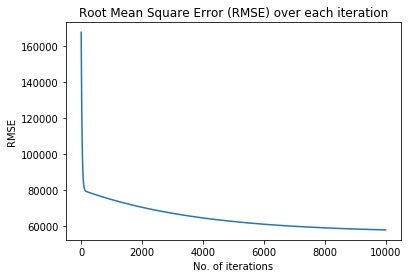

In [12]:
#Plot line graph of RMSE over each iteration

plt.title('Root Mean Square Error (RMSE) over each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE')
plt.plot(history)
plt.show()

In [13]:
#Finding Final RMSE: get last value in history python indexing
history[-1]

57656.149200050015

# Adding a bias term

In [14]:
#Add bias term to linear model for better performance!
ones = np.ones((x.shape[0],1))
x = np.hstack((ones,x))

In [15]:
weights,history = train(x,y,iterations, alpha)

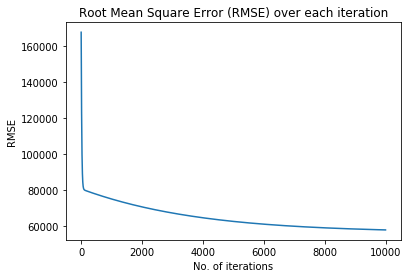

57639.74471816672

In [16]:
#Plot line graph of RMSE over each iteration
plt.title('Root Mean Square Error (RMSE) over each iteration')
plt.xlabel('No. of iterations')
plt.ylabel('RMSE')
plt.plot(history)
plt.show()

history[-1]

In [17]:
#Finding Average Error
n = x.shape[0]
predictions = np.inner(x,weights)
error = predictions - y
average_error =  np.sum(abs(error)) / n
average_error

62043.77106029793

In [18]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

# Binary Classification

In [19]:
#Greater than amount, gets label 1, lesser than gets -1
def apply_binary(y,num):
    y_binary = np.zeros_like(y)
    for idx, sample in enumerate(y):
        if sample > num:
            y_binary[idx] = 1
        else:
            y_binary[idx] = -1
                    
    return y_binary     

In [20]:
y

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [21]:
#Apply binary labels to your data
y_binary = apply_binary(y, 200000)
#Using the same train function you created earlier
weights,history = train(x,y_binary,iterations, alpha)

In [22]:
y_binary

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [23]:
weights

array([-0.45608872, -0.5328287 , -0.57504923,  0.6046662 ,  0.59780057,
        0.11947383,  0.27244028,  0.50651298,  3.5334492 ])

In [24]:
classifications = np.sign(np.inner(x,weights))

In [25]:
#Calculate accuracy of model
np.mean(classifications == y_binary)

0.7797680223168404

In [26]:
#To test how your classifier does in comparison to off the shelf algorithms
from sklearn import linear_model

In [27]:
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(x, y_binary)
predicted = clf.predict(x)
np.mean(predicted == y_binary)

0.7935692262516517